# Named-Entity recognition


In [1]:
import os
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

DATA_PATH = "../data/raw"


In [4]:
with open(os.path.join(DATA_PATH, "ner_article.txt")) as nart:
    article = nart.read()


In [6]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


In [26]:
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict
from pylab import rcParams

rcParams["figure.figsize"] = (16, 9)


chunked_sentences = pickle.load(
    open(os.path.join(DATA_PATH, "chunked_sentences.pkl"), "rb")
)


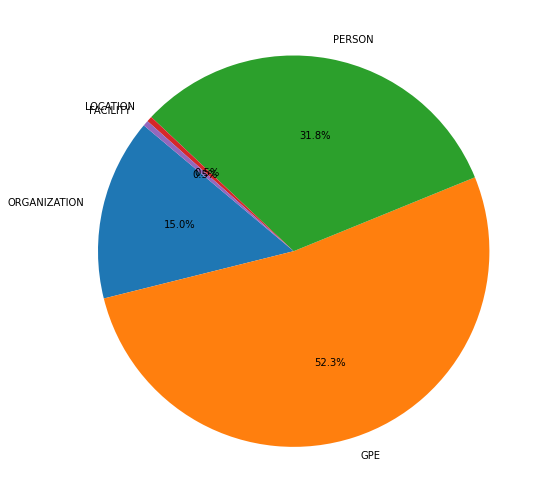

In [27]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):
            ner_categories[chunk.label()] += 1

# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=140)

# Display the chart
plt.show()


## Intro to SpaCy


In [32]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load("en_core_web_sm")

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ORG Uber
ORG Apple
PERSON Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
LOC Silicon Valley’s
NORP democratic
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


## Multilingual NER w/ polyglot


In [36]:
from polyglot.text import Text

with open(os.path.join(DATA_PATH, "fr_article.txt")) as frart:
    article = frart.read()


In [39]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)

# Print the type of ent
print(type(ent))


['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


In [41]:
# Create the list of tuples: entities
entities = [(ent.tag, " ".join(ent)) for ent in txt.entities]

# Print entities
print(entities)


[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


In [42]:
txt = Text(
    "\ufeffLina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin. Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.\r\n\r\n\r\nLIna del Castillo\r\n\r\n\r\nActualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del n...el tren de medianoche que lleva a miles y miles de cadáveres uno encima del otro como tantos racimos del banano que acabarán tirados al mar. Ningún recuento periodístico podría provocar nuestra imaginación y nuestra memoria como este relato de García Márquez.\r\n\r\n\r\nContenido Relacionado\r\n\r\n\r\nLea más artículos sobre el archivo de Gabriel García Márquez\r\n\r\n\r\nReciba mensualmente las últimas noticias e información del Harry Ransom Center con eNews, nuestro correo electrónico mensual. ¡Suscríbase hoy!"
)


In [44]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if "Márquez" in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)


4
0.26666666666666666
